In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams["figure.figsize"] = [10, 10]
pd_df = pd.read_excel('/mnt/wd/nsap/param_CSM_chr1.xlsx')
pd_df.drop(pd_df.tail(1).index,inplace=True)
for col in pd_df.columns:
    pd_df[col] = pd.to_numeric(pd_df[col])
print(pd_df)

max_dbscan_shil = pd_df['dbscan_shil_score'].max()
max_hdbscan_shil = pd_df['hdbscan_shil_score'].max()
print('Max Silhouette score for dbscan and hdbscan are: ', max_dbscan_shil,max_hdbscan_shil)

max_dbscan_CH = pd_df['dbscan_CH'].max()
max_hdbscan_CH = pd_df['hdbscan_CH'].max()
print('Max Calinski-Harabazs index for dbscan and hdbscan are: ', max_dbscan_CH,max_hdbscan_CH)

    CSM  dbscan_shil_score  dbscan_CH  dbscan_of_clusters  hdbscan_shil_score  \
0  0.01          -0.034947  24.986490                 458            0.275815   
1  0.11           0.092651  34.259231                1243            0.280492   
2  0.21           0.176683  43.305442                1596            0.284934   
3  0.31           0.248770  53.392925                1900            0.289324   
4  0.41           0.299958  62.097187                2048            0.286161   
5  0.51           0.317329  57.214727                2028            0.276043   
6  0.61           0.274480  39.399054                1733            0.239001   
7  0.71           0.193790  28.972659                1149            0.180964   
8  0.81           0.121027  25.995577                 625            0.121586   
9  0.91           0.047582  25.752453                 209            0.053133   

   hdbscan_CH  hdbscan_number_of_clusters  
0   54.556179                        1980  
1   58.106083       

0.41
3    0.31
Name: CSM, dtype: float64


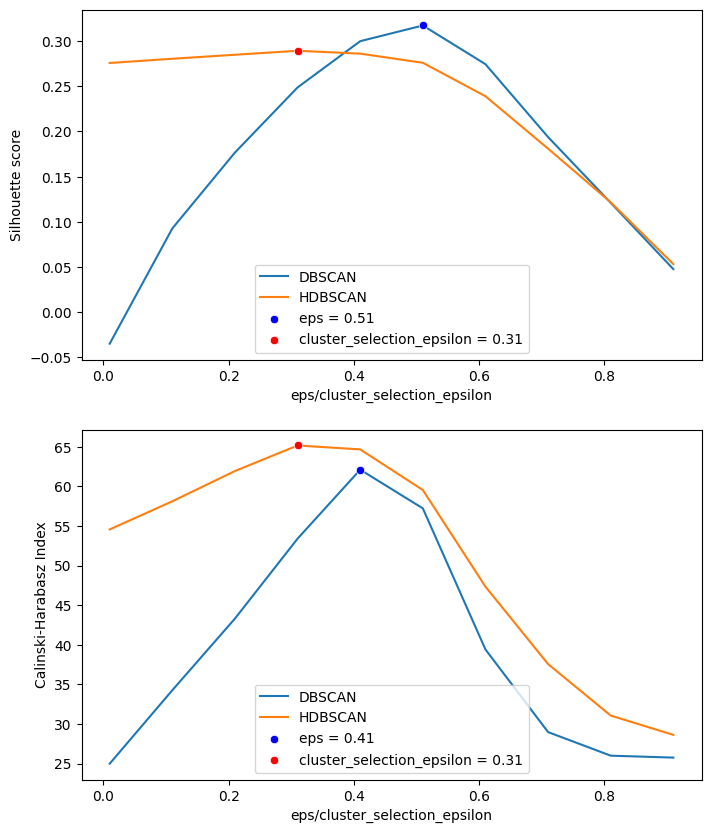

In [77]:
### Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
# Sil_score
sns.lineplot(x='CSM', 
             y='dbscan_shil_score', 
             data=pd_df, 
             label='DBSCAN',
             ax=axes[0])
sns.lineplot(x='CSM', 
             y='hdbscan_shil_score', 
             data=pd_df, 
             label='HDBSCAN',
             ax=axes[0])
# Mark the maximum values
max_eps = pd_df.loc[pd_df['dbscan_shil_score'] == max_dbscan_shil, 'CSM']
max_eps_ = float(max_eps.values[0])
sns.scatterplot(x=max_eps, 
                y=max_dbscan_shil, 
                color='blue', 
                label=f"eps = {max_eps_:.{2}f}",
                alpha=1,
                legend='auto', 
                zorder=10,
                ax=axes[0])
max_csm = pd_df.loc[pd_df['hdbscan_shil_score'] == max_hdbscan_shil, 'CSM']
max_csm_ = float(max_csm.values[0])
sns.scatterplot(x=max_csm, 
                y=max_hdbscan_shil, 
                color='red', 
                label=f"cluster_selection_epsilon = {max_csm_:.{2}f}",
                legend='auto', 
                zorder=10,
                ax=axes[0])
axes[0].set_ylabel('Silhouette score')
axes[0].set_xlabel('eps/cluster_selection_epsilon')

# CH_score
sns.lineplot(x='CSM', 
             y='dbscan_CH', 
             data=pd_df, 
             label='DBSCAN',
             ax=axes[1])
sns.lineplot(x='CSM', 
             y='hdbscan_CH', 
             data=pd_df, 
             label='HDBSCAN',
             ax=axes[1])
# Mark the maximum values
max_eps = pd_df.loc[pd_df['dbscan_CH'] == max_dbscan_CH, 'CSM']
max_eps_ = float(max_eps.values[0])
print(max_eps_)
sns.scatterplot(x=max_eps, 
                y=max_dbscan_CH, 
                color='blue', 
                label=f"eps = {max_eps_:.{2}f}",
                alpha=1,
                legend='auto', 
                zorder=10,
                ax=axes[1])
max_csm = pd_df.loc[pd_df['hdbscan_CH'] == max_hdbscan_CH, 'CSM']
print(max_csm)
max_csm_ = float(max_csm.values[0])

sns.scatterplot(x=max_csm, 
                y=max_hdbscan_CH, 
                color='red', 
                label=f"cluster_selection_epsilon = {max_csm_:.{2}f}",
                legend='auto', 
                zorder=10,
                ax=axes[1])
axes[1].set_ylabel('Calinski-Harabasz Index')
axes[1].set_xlabel('eps/cluster_selection_epsilon')
plt.savefig('/mnt/wd/nsap/Clustering/Parameters_search/B_scores_vs_eps_chr1.pdf', format='pdf')